In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [115]:
df= pd.read_csv('data/cancer_classification.csv')

In [116]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

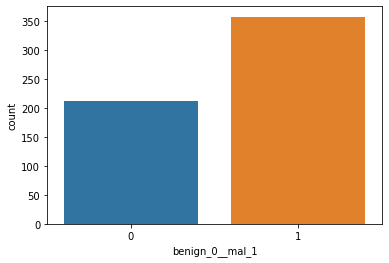

In [117]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

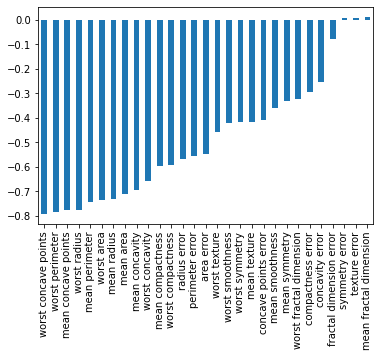

In [118]:
df.corr()['benign_0__mal_1'][:-1].sort_values()[:-1].plot(kind='bar')

<AxesSubplot:>

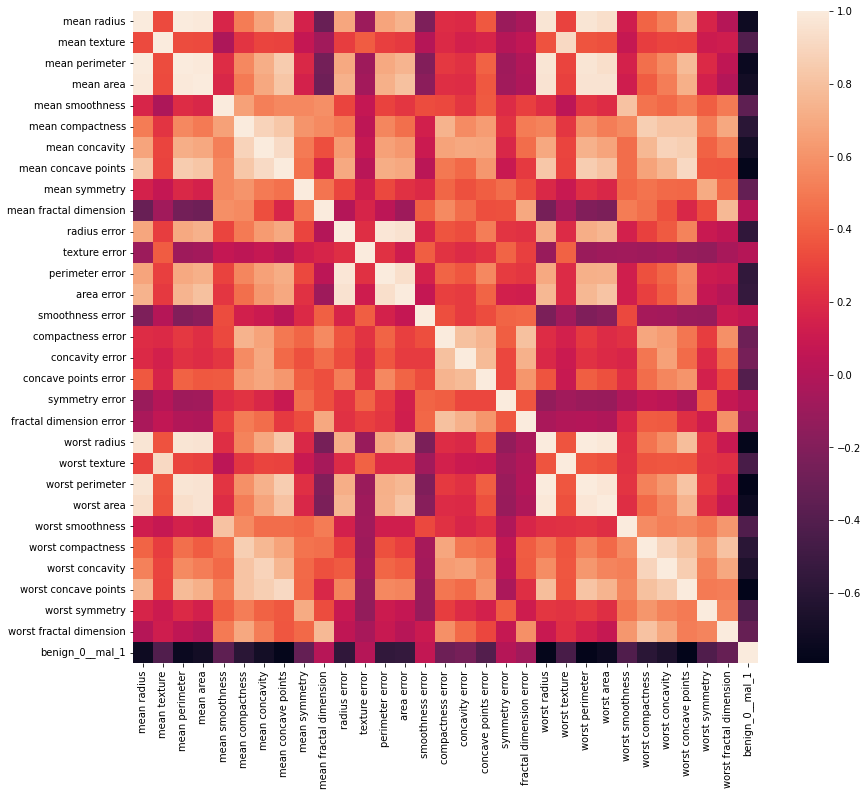

In [119]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr())

In [120]:
X =  df.drop('benign_0__mal_1',axis=1).values
y= df['benign_0__mal_1'].values

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25)

In [123]:
from sklearn.preprocessing import MinMaxScaler


In [124]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [125]:
from tensorflow.keras.layers import Dense,Dropout

In [126]:
from tensorflow.keras.models import Sequential

In [127]:
X_train.shape

(426, 30)

In [128]:
model =Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(35,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [129]:
model.fit(x=X_train,y=y_train,epochs=150,validation_data=(X_test,y_test))

Epoch 1/150
14/14 [==============================] - 1s 22ms/step - loss: 0.6807 - val_loss: 0.6651
Epoch 2/150
14/14 [==============================] - 0s 6ms/step - loss: 0.6464 - val_loss: 0.6284
Epoch 3/150
14/14 [==============================] - 0s 5ms/step - loss: 0.6120 - val_loss: 0.5830
Epoch 4/150
14/14 [==============================] - 0s 7ms/step - loss: 0.5623 - val_loss: 0.5191
Epoch 5/150
14/14 [==============================] - 0s 11ms/step - loss: 0.5051 - val_loss: 0.4467
Epoch 6/150
14/14 [==============================] - 0s 8ms/step - loss: 0.4429 - val_loss: 0.3732
Epoch 7/150
14/14 [==============================] - 0s 6ms/step - loss: 0.3838 - val_loss: 0.3086
Epoch 8/150
14/14 [==============================] - 0s 6ms/step - loss: 0.3316 - val_loss: 0.2560
Epoch 9/150
14/14 [==============================] - 0s 10ms/step - loss: 0.2921 - val_loss: 0.2169
Epoch 10/150
14/14 [==============================] - 0s 7ms/step - loss: 0.2602 - val_loss: 0.1869
Epoch 

Epoch 83/150
14/14 [==============================] - 0s 7ms/step - loss: 0.0570 - val_loss: 0.0304
Epoch 84/150
14/14 [==============================] - 0s 9ms/step - loss: 0.0572 - val_loss: 0.0311
Epoch 85/150
14/14 [==============================] - 0s 6ms/step - loss: 0.0566 - val_loss: 0.0279
Epoch 86/150
14/14 [==============================] - 0s 10ms/step - loss: 0.0578 - val_loss: 0.0312
Epoch 87/150
14/14 [==============================] - 0s 7ms/step - loss: 0.0554 - val_loss: 0.0296
Epoch 88/150
14/14 [==============================] - 0s 6ms/step - loss: 0.0538 - val_loss: 0.0296
Epoch 89/150
14/14 [==============================] - 0s 12ms/step - loss: 0.0531 - val_loss: 0.0290
Epoch 90/150
14/14 [==============================] - 0s 9ms/step - loss: 0.0537 - val_loss: 0.0277
Epoch 91/150
14/14 [==============================] - 0s 8ms/step - loss: 0.0543 - val_loss: 0.0285
Epoch 92/150
14/14 [==============================] - 0s 6ms/step - loss: 0.0537 - val_loss: 0.030

In [130]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

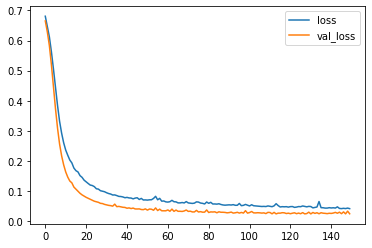

In [131]:
losses.plot()

In [132]:
##overfitted data because train loss goes down while test goes up

In [133]:
from tensorflow.keras.layers import Dropout

In [134]:
#implement early stopping
#implementing dropout layers
model =Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(35,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [135]:
from tensorflow.keras.callbacks import EarlyStopping

In [136]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=0,patience=25)

In [137]:
model.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),callbacks=[early_stop],verbose=0)

<AxesSubplot:>

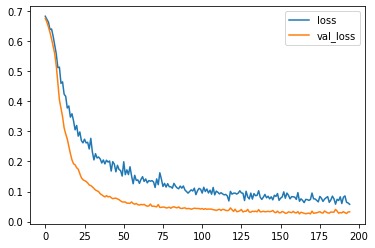

In [138]:
stopped_loss=pd.DataFrame(model.history.history)
stopped_loss.plot()

In [139]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [140]:
predictions

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [141]:
from sklearn.metrics import classification_report,confusion_matrix

In [142]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.99      0.99      0.99        83

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [143]:
print(confusion_matrix(y_test,predictions))

[[59  1]
 [ 1 82]]
